# Basic Plotting

## readcols & plotting data

In order to use readcol-like module in IDL, we need to download "pygoods" python package from http://www.stsci.edu/~ferguson/software/pygoodsdist/doc/index.html 

"Readcol" Guide is available in
http://www.stsci.edu/~ferguson/software/pygoodsdist/doc/readcol.html

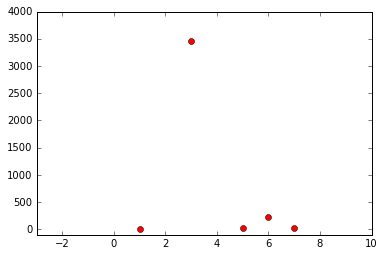

In [2]:
import pygoods as pyg
import matplotlib.pyplot as plt

a,b = pyg.fgetcols('../data/colms.dat',1,2)

plt.plot(a,b,'ro')
plt.axis([-3,10,-100,4000])
plt.show()

Populating the interactive namespace from numpy and matplotlib


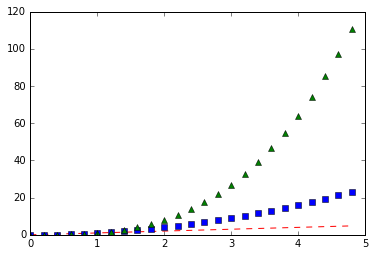

In [3]:
# recover matplotlib defaults 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
plt.show()
#plt.savefig('test.png')

### dark background

/home/astrodoo/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


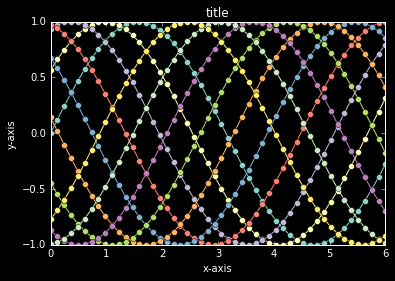

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

L = 6
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.color_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    plt.plot(x, np.sin(x + s), 'o-')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('title')

plt.show()

### save figures

Note that matplotlib.use('Agg') is not compatible with "%pylab inline". But without the option, we can save the figure as png, eps, pdf.

Populating the interactive namespace from numpy and matplotlib


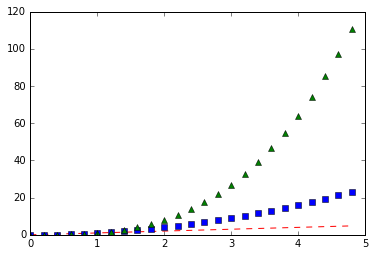

In [1]:
# recover matplotlib defaults 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%pylab inline

import matplotlib
#matplotlib.use('Agg')
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
#plt.show()
#plt.savefig('../figures/test.png')
plt.savefig('../figures/test.eps')

## Multiplots

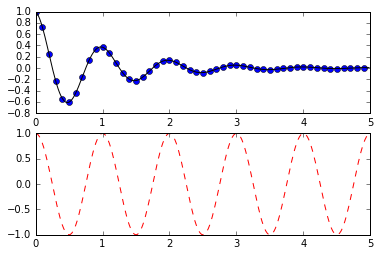

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t)*np.cos(2.*np.pi*t)

t1 = np.arange(0.,5.,0.1)
t2 = np.arange(0.,5.,0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1,f(t1),'bo',t2,f(t2),'k')

plt.subplot(212)
plt.plot(t2,np.cos(2.*np.pi*t2),'r--')
plt.show()

## Two scales

Demonstrate how to do two plots on the same axes with different left
right scales.


The trick is to use *2 different axes*.  Turn the axes rectangular
frame off on the 2nd axes to keep it from obscuring the first.
Manually set the tick locs and labels as desired.  You can use
separate matplotlib.ticker formatters and locators as desired since
the two axes are independent.

This is achieved in the following example by calling the Axes.twinx()
method, which performs this work. See the source of twinx() in
axes.py for an example of how to do it for different x scales. (Hint:
use the xaxis instance and call tick_bottom and tick_top in place of
tick_left and tick_right.)

The twinx and twiny methods are also exposed as pyplot functions.

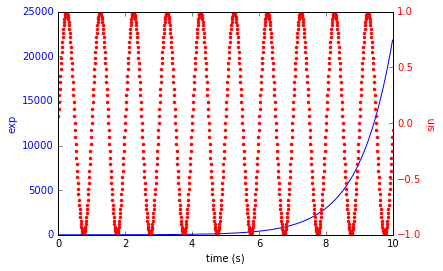

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
s2 = np.sin(2*np.pi*t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

## Log scale

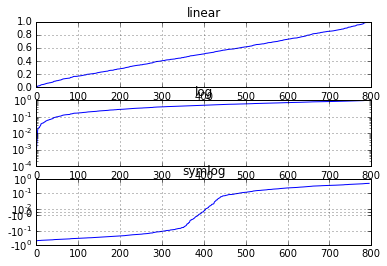

In [8]:
import numpy as np
import matplotlib.pyplot as plt

y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y>0) & (y<1)]
y.sort()
x = np.arange(len(y))

plt.figure(1)

#linear plot
plt.subplot(311)
plt.plot(x,y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

#log
plt.subplot(312)
plt.plot(x,y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

#symmetric log
plt.subplot(313)
plt.plot(x,y-y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)

plt.show()

In [9]:
#? plt.yscale

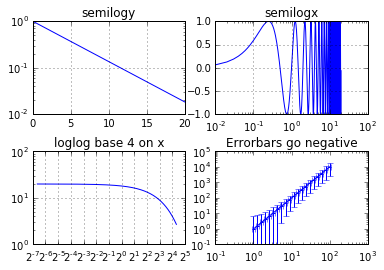

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.4)
t = np.arange(0.01, 20.0, 0.01)

# log y axis
plt.subplot(221)
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(t, 20*np.exp(-t/10.0), basex=2)
plt.grid(True)
plt.title('loglog base 4 on x')

# with errorbars: clip non-positive values
ax = plt.subplot(224)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0
plt.errorbar(x, y, xerr=0.1*x, yerr=5.0 + 0.75*y)
ax.set_ylim(ymin=0.1)
ax.set_title('Errorbars go negative')


plt.show()

## Text with LaTex

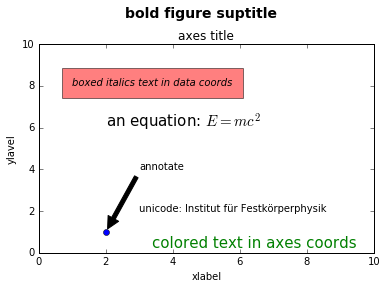

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle',fontsize=14,fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylavel')

ax.text(1,8, 'boxed italics text in data coords', style='italic',
       bbox={'facecolor':'red','alpha':0.5,'pad':10})
ax.text(2,6, r'an equation: $E=mc^2$', fontsize=15)
ax.text(3,2,unicode('unicode: Institut f\374r Festk\366rperphysik', 'latin-1'))
ax.text(0.95,0.01,'colored text in axes coords',
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes,
       color='green', fontsize=15)

ax.plot([2],[1],'o')
ax.annotate('annotate', xy=(2,1), xytext=(3,4),
           arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0,10,0,10])

plt.show()

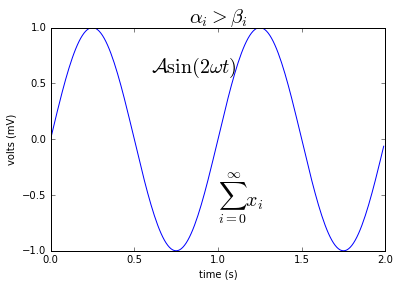

In [12]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.,2.,0.01)
s = np.sin(2.*np.pi*t)

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1,-0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6,0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
        fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\ \alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ \ldots$
2 $\frac{3}{4},\ \binom{3}{4},\ \stackrel{3}{4},\ \left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$
3 $\sqrt{2},\ \sqrt[3]{x},\ \ldots$
4 $\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ \mathrm{or}\ \mathcal{CALLIGRAPHY}$
5 $\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ \hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ \ldots$
6 $\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ \Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ \aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$
7 $\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ \log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ \infty,\ \partial

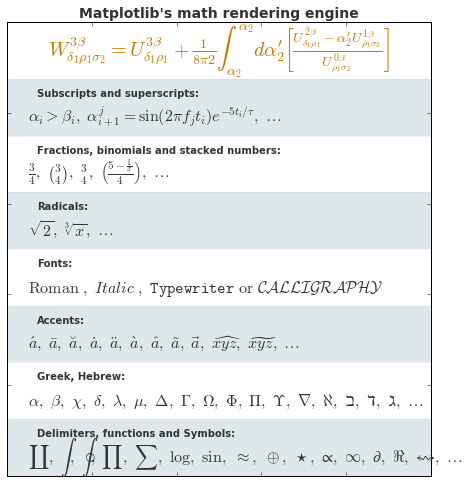

In [13]:
"""
Selected features of Matplotlib's math rendering engine.
"""
from __future__ import print_function
import matplotlib.pyplot as plt
import os
import sys
import re
import gc

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\ "
    r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
    r"\ldots$",

    2: r"$\frac{3}{4},\ \binom{3}{4},\ \stackrel{3}{4},\ "
    r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    3: r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    4: r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
    r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
    r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
    r"\ldots$",

    6: r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
    r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
    r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    7: r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
    r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
    r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$"}


def doall():
    # Colors used in mpl online documentation.
    mpl_blue_rvb = (191./255., 209./256., 212./255.)
    mpl_orange_rvb = (202/255., 121/256., 0./255.)
    mpl_grey_rvb = (51./255., 51./255., 51./255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 7))
    plt.axes([0.01, 0.01, 0.98, 0.90], axisbg="white", frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = (1. / (n_lines))

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59*line_axesfrac),
                 xycoords='data', color=mpl_orange_rvb, ha='center',
                 fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1. - (i_line)*line_axesfrac
        baseline_next = baseline - line_axesfrac*1.
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3*line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75*line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb,
                     fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
        print(i, s)
    plt.show()

if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    fd = open("mathtext_examples.ltx", "w")
    fd.write("\\documentclass{article}\n")
    fd.write("\\usepackage{amsmath, amssymb}\n")
    fd.write("\\begin{document}\n")
    fd.write("\\begin{enumerate}\n")

    for i in range(n_lines):
        s = mathext_demos[i]
        s = re.sub(r"(?<!\\)\$", "$$", s)
        fd.write("\\item %s\n" % s)

    fd.write("\\end{enumerate}\n")
    fd.write("\\end{document}\n")
    fd.close()

    os.system("pdflatex mathtext_examples.ltx")
else:
    doall()

## 2D Image & colorbar

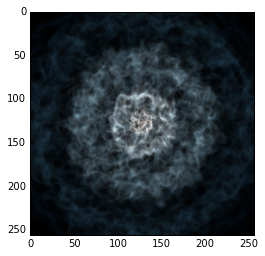

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('../figures/test_rendering.png')
imgplot = plt.imshow(img)

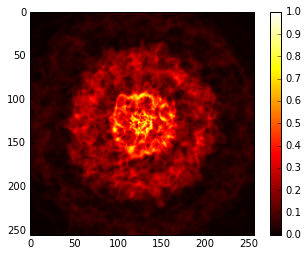

In [15]:
lum_img = img[:,:,0]
imgplot2 = plt.imshow(lum_img)
imgplot2.set_cmap('hot')
plt.colorbar()

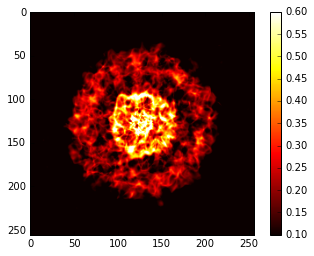

In [16]:
imgplot2 = plt.imshow(lum_img)
imgplot2.set_cmap('hot')
imgplot2.set_clim(0.1,0.6)
plt.colorbar()

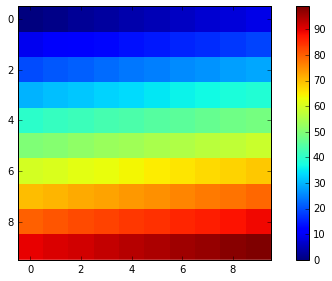

In [17]:
import matplotlib.pyplot as plt

arr = np.arange(100).reshape((10,10))

plt.close('all')
fig = plt.figure(figsize(5,4))

ax = plt.subplot(111)
im = ax.imshow(arr, interpolation='none')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right","5%",pad="10%")
plt.colorbar(im, cax=cax)

plt.tight_layout()

In [18]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

## Contour

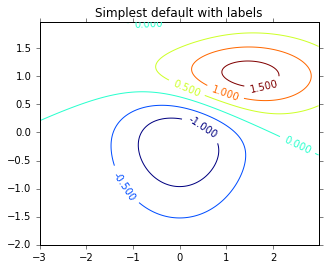

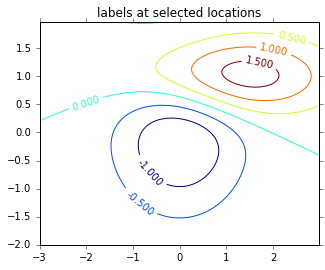

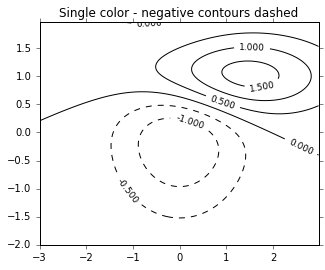

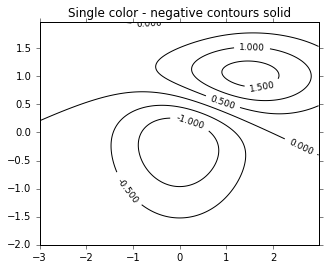

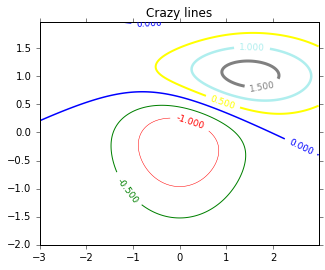

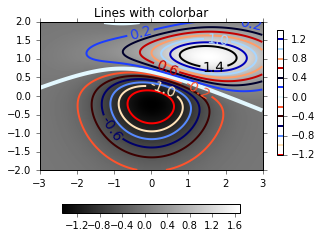

In [19]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()

## Logarithmic contour

/home/astrodoo/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


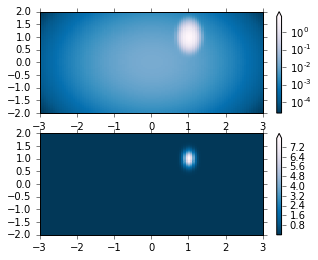

In [20]:
"""
Demonstration of using logarithmic scale onto the map
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

'''
Lognorm: Instead of pcolor log10(Z1) you can have colorbars that have
the exponential labels using a norm.
'''
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) +  \
    0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z1,
                   norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()),
                   cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
fig.show()

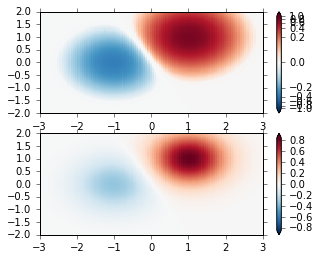

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

"""
SymLogNorm: two humps, one negative and one positive, The positive
with 5-times the amplitude. Linearly, you cannot see detail in the
negative hump.  Here we logarithmically scale the positive and
negative data separately.

Note that colorbar labels do not come out looking very good.
"""
N=100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                              vmin=-1.0, vmax=1.0),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[1], extend='both')
fig.show()

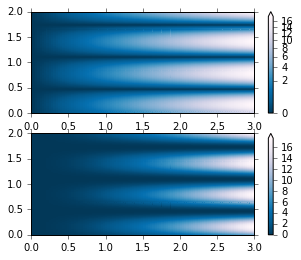

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

'''
PowerNorm: Here a power-law trend in X partially obscures a rectified
sine wave in Y. We can remove the power law using a PowerNorm.
'''
X, Y = np.mgrid[0:3:complex(0, N), 0:2:complex(0, N)]
Z1 = (1 + np.sin(Y * 10.)) * X**(2.)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1, norm=colors.PowerNorm(gamma=1./2.),
                       cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='PuBu_r')
fig.colorbar(pcm, ax=ax[1], extend='max')
fig.show()

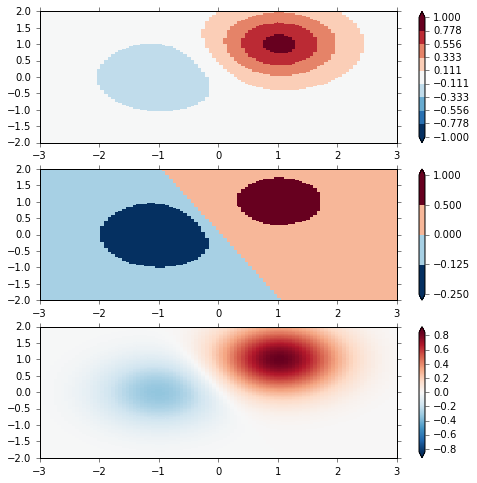

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

'''
BoundaryNorm: For this one you provide the boundaries for your colors,
and the Norm puts the first color in between the first pair, the
second color between the second pair, etc.
'''

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
ax = ax.flatten()
# even bounds gives a contour-like effect
bounds = np.linspace(-1, 1, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=norm,
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both', orientation='vertical')

# uneven bounds changes the colormapping:
bounds = np.array([-0.25, -0.125, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[1], extend='both', orientation='vertical')

pcm = ax[2].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[2], extend='both', orientation='vertical')
fig.show()

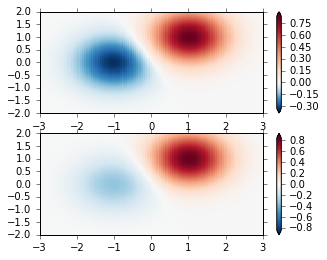

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

N = 100
'''
Custom Norm: An example with a customized normalization.  This one
uses the example above, and normalizes the negative data differently
from the positive.
'''
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = (bivariate_normal(X, Y, 1., 1., 1.0, 1.0))**2  \
    - 0.4 * (bivariate_normal(X, Y, 1.0, 1.0, -1.0, 0.0))**2
Z1 = Z1/0.03

# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:


class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
#####
fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolormesh(X, Y, Z1,
                       norm=MidpointNormalize(midpoint=0.),
                       cmap='RdBu_r')
fig.colorbar(pcm, ax=ax[0], extend='both')

pcm = ax[1].pcolormesh(X, Y, Z1, cmap='RdBu_r', vmin=-np.max(Z1))
fig.colorbar(pcm, ax=ax[1], extend='both')
fig.show()

## Legend

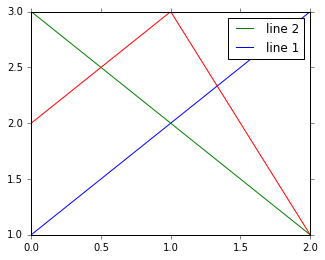

In [25]:
import matplotlib.pyplot as plt
p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
p3, = plt.plot([2,3,1])
plt.legend([p2,p1],['line 2','line 1'])

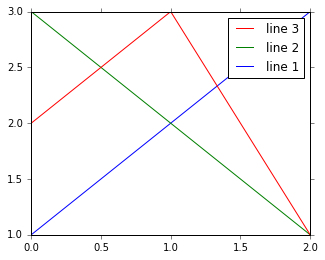

In [26]:
ax = plt.subplot(111)
p1, = ax.plot([1,2,3], label="line 1")
p2, = ax.plot([3,2,1], label="line 2")
p3, = ax.plot([2,3,1], label="line 3")

handles, labels = ax.get_legend_handles_labels()
#ax.legend()
ax.legend(handles[::-1], labels[::-1])

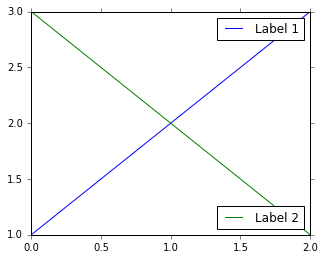

In [27]:
import matplotlib.pyplot as plt

p1, = plt.plot([1,2,3], label='test1')
p2, = plt.plot([3,2,1], label='test2')

l1 = plt.legend([p1], ["Label 1"], loc=1)
l2 = plt.legend([p2], ["Label 2"], loc=4) # this removes l1 from the axes

# add l1 as a separate artist to the axes
plt.gca().add_artist(l1)

plt.show()

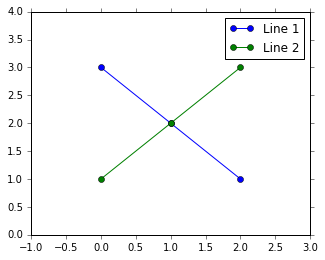

In [28]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D as hdl2D

line1, = plt.plot([3,2,1], marker='o', label='Line 1')
line2, = plt.plot([1,2,3], marker='o', label='Line 2')

plt.axis([-1.,3.,0.,4.])

plt.legend(handler_map={line1: hdl2D(numpoints=2)})

plt.show()

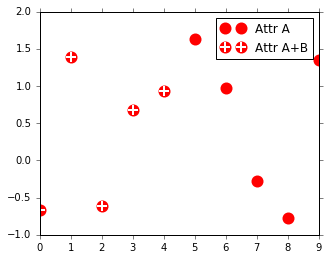

In [29]:
import matplotlib.pyplot as plt
import numpy as np

z = np.random.randn(10)

p1, = plt.plot(z,'ro', ms=10, mfc='r', mew=2, mec='r') # red filled circle
p2, = plt.plot(z[:5],'w+', ms=10, mec='w',mew=2) # white cross

plt.legend([p1,(p1,p2)], ['Attr A', 'Attr A+B'])

plt.show()

In [30]:
#? plt.plot

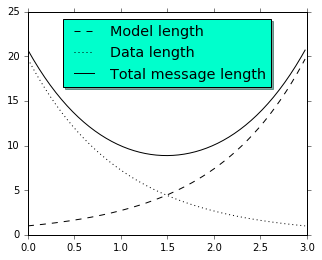

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
plt.plot(a, c, 'k--', label='Model length')
plt.plot(a, d, 'k:', label='Data length')
plt.plot(a, c + d, 'k', label='Total message length')

legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

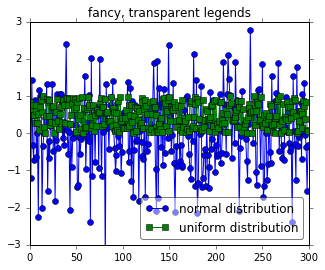

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)
fig, ax = plt.subplots(1)
ax.plot(np.random.randn(300), 'o-', label='normal distribution')
ax.plot(np.random.rand(300), 's-', label='uniform distribution')
ax.set_ylim(-3, 3)
ax.legend(loc='best', fancybox=True, framealpha=0.5)

ax.set_title('fancy, transparent legends')

## Zoom effect

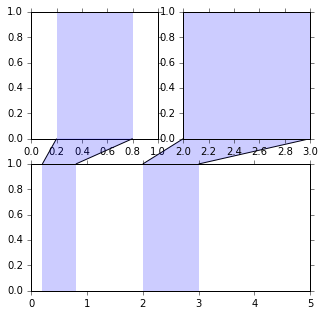

In [35]:
from matplotlib.transforms import Bbox, TransformedBbox, \
    blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    (xmin,xmax) : the limits of the colored area in both plot axes.

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used ti create
    patches.

    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


import matplotlib.pyplot as plt

plt.figure(1, figsize=(5, 5))
ax1 = plt.subplot(221)
ax2 = plt.subplot(212)
ax2.set_xlim(0, 1)
ax2.set_xlim(0, 5)
zoom_effect01(ax1, ax2, 0.2, 0.8)


ax1 = plt.subplot(222)
ax1.set_xlim(2, 3)
ax2.set_xlim(0, 5)
zoom_effect02(ax1, ax2)

plt.show()

## Scatter

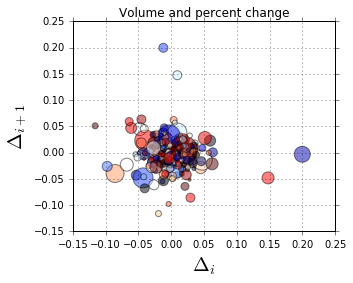

In [36]:
"""
Demo of scatter plot with varying marker colors and sizes.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('goog.npy')
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. Hovever this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later
    price_data = np.load(datafile, encoding='bytes').view(np.recarray)
except TypeError:
    price_data = np.load(datafile).view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close)/price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

## Fill

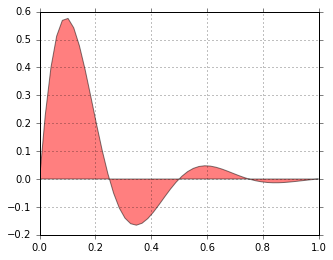

In [37]:
"""
Simple demo of the fill function.
"""
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

plt.fill(x, y, 'r', alpha=0.5)
plt.grid(True)
plt.show()

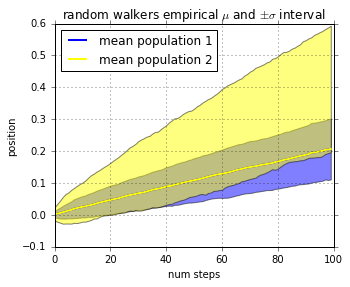

In [38]:
import matplotlib.pyplot as plt
import numpy as np

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
ax.plot(t, mu1, lw=2, label='mean population 2', color='yellow')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
ax.set_title('random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

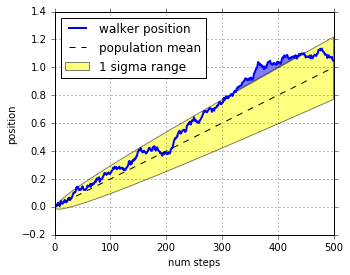

In [39]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)
ax.plot(t, X, lw=2, label='walker position', color='blue')
ax.plot(t, mu*t, lw=1, label='population mean', color='black', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                label='1 sigma range')
ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary
ax.fill_between(t, upper_bound, X, where=X>upper_bound, facecolor='blue', alpha=0.5)
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

## Patches

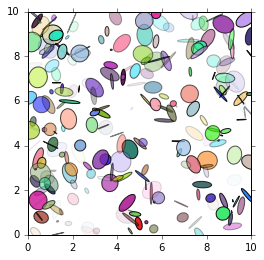

In [40]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=rnd.rand(2)*10, width=rnd.rand(), height=rnd.rand(), angle=rnd.rand()*360)
        for i in range(NUM)]

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rnd.rand())
    e.set_facecolor(rnd.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

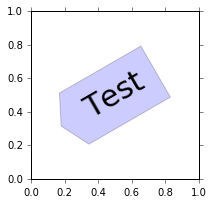

In [41]:
from matplotlib.path import Path
from matplotlib.patches import BoxStyle
import matplotlib.pyplot as plt

# we may derive from matplotlib.patches.BoxStyle._Base class.
# You need to overide transmute method in this case.

class MyStyle(BoxStyle._Base):
    """
    A simple box.
    """

    def __init__(self, pad=0.3):
        """
        The arguments need to be floating numbers and need to have
        default values.
        
         *pad*
            amount of padding
        """

        self.pad = pad
        super(MyStyle, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        Given the location and size of the box, return the path of
        the box around it.

         - *x0*, *y0*, *width*, *height* : location and size of the box
         - *mutation_size* : a reference scale for the mutation.

        Often, the *mutation_size* is the font size of the text.
        You don't need to worry about the rotation as it is
        automatically taken care of.
        """

        # padding
        pad = mutation_size * self.pad

        # width and height with padding added.
        width, height = width + 2.*pad, \
                        height + 2.*pad,

        # boundary of the padded box
        x0, y0 = x0-pad, y0-pad,
        x1, y1 = x0+width, y0 + height

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0-pad, (y0+y1)/2.), (x0, y0),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path


# register the custom style
BoxStyle._style_list["angled"] = MyStyle

plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)
ax.text(0.5, 0.5, "Test", size=30, va="center", ha="center", rotation=30,
        bbox=dict(boxstyle="angled,pad=0.5", alpha=0.2))

del BoxStyle._style_list["angled"]

plt.show()

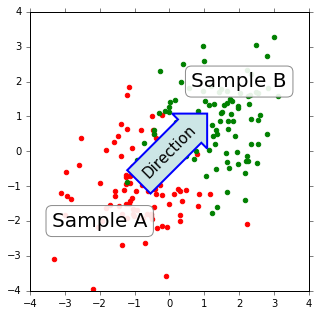

In [42]:
import numpy.random
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(5,5))
fig.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)


bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.draw()
plt.show()

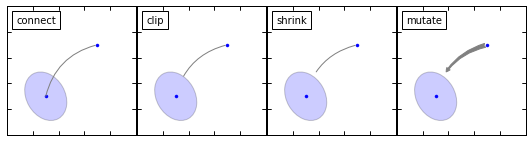

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)


ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)


ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

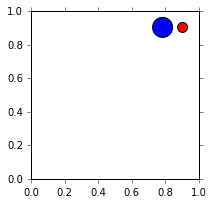

In [44]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)


ada = AnchoredDrawingArea(40, 20, 0, 0,
                          loc=1, pad=0., frameon=False)
p1 = Circle((10, 10), 10)
ada.drawing_area.add_artist(p1)
p2 = Circle((30, 10), 5, fc="r")
ada.drawing_area.add_artist(p2)

ax.add_artist(ada)

plt.show()

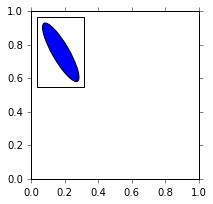

In [45]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox

fig=plt.figure(1, figsize=(3,3))
ax = plt.subplot(111)

box = AnchoredAuxTransformBox(ax.transData, loc=2)
el = Ellipse((0,0), width=0.1, height=0.4, angle=30) # in data coordinates!
box.drawing_area.add_artist(el)

ax.add_artist(box)

plt.show()

## Path

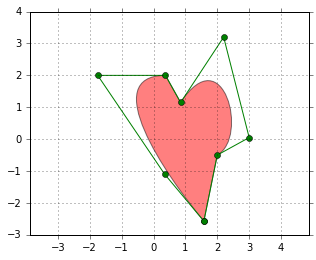

In [46]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

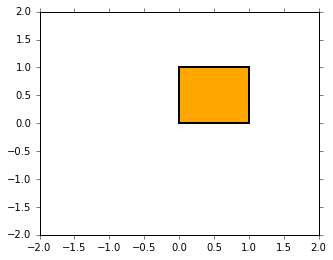

In [47]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.), # left, bottom
    (0., 1.), # left, top
    (1., 1.), # right, top
    (1., 0.), # right, bottom
    (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

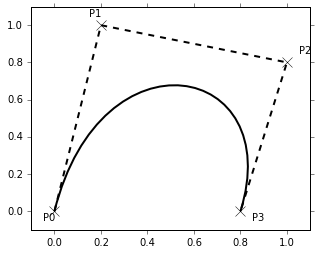

In [48]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.),  # P0
    (0.2, 1.), # P1
    (1., 0.8), # P2
    (0.8, 0.), # P3
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

xs, ys = zip(*verts)
ax.plot(xs, ys, 'x--', lw=2, color='black', ms=10)

ax.text(-0.05, -0.05, 'P0')
ax.text(0.15, 1.05, 'P1')
ax.text(1.05, 0.85, 'P2')
ax.text(0.85, -0.05, 'P3')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

### Adding a shadow

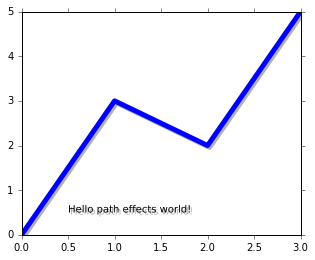

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

text = plt.text(0.5, 0.5, 'Hello path effects world!',
                path_effects=[path_effects.withSimplePatchShadow()])

plt.plot([0, 3, 2, 5], linewidth=5, color='blue',
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.show()

## Plot3D

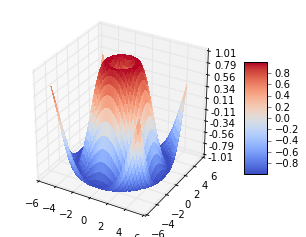

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Stream line

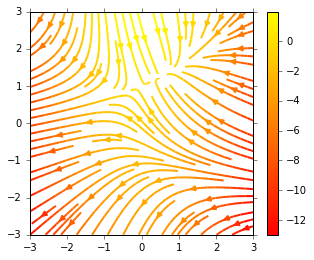

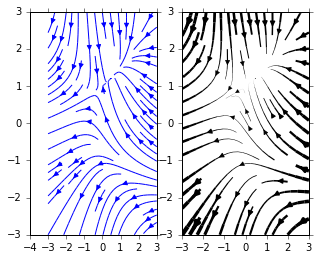

In [51]:
"""
Demo of the `streamplot` function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
"""
import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()

## Transformations

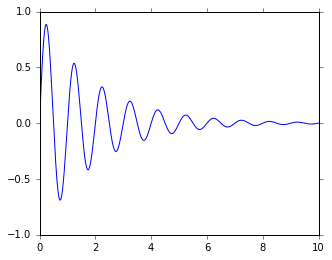

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

plt.show()

In [53]:
type(ax.transData)

matplotlib.transforms.CompositeGenericTransform

In [54]:
# transform from the data coordinates to display coordinates
ax.transData.transform((5, 0))

array([ 205.,  164.])

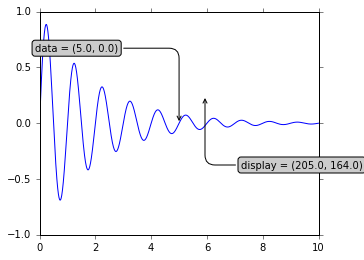

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

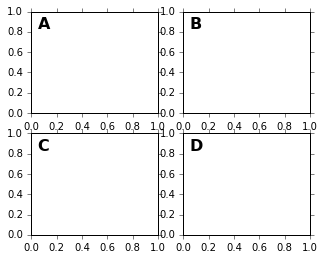

In [56]:
"""
Axes coordinates
"""
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(2,2,i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')

plt.show()

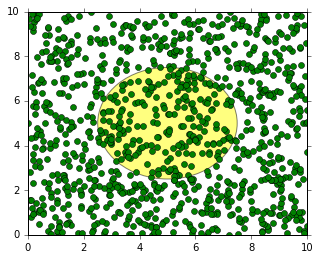

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig = plt.figure()
ax = fig.add_subplot(111)
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go')  # plot some data in data coordinates

circ = patches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                      facecolor='yellow', alpha=0.5)
ax.add_patch(circ)

plt.show()

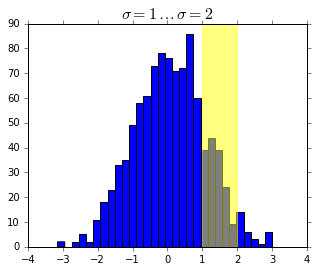

In [58]:
"""
Blended transformations
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.random.randn(1000)

ax.hist(x, 30)
ax.set_title(r'$\sigma=1 \/ \dots \/ \sigma=2$', fontsize=16)

# the x coords of this transformation are data, and the
# y coord are axes
trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)

# highlight the 1..2 stddev region with a span.
# We want x to be in data coordinates and y to
# span from 0..1 in axes coords
rect = patches.Rectangle((1,0), width=1, height=1,
                         transform=trans, color='yellow',
                         alpha=0.5)

ax.add_patch(rect)

plt.show()

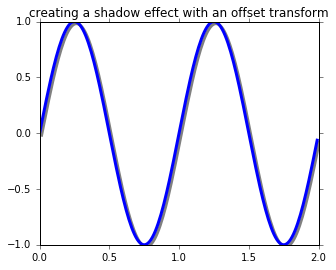

In [59]:
"""
offset transform to creat a shadow effect
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

fig = plt.figure()
ax = fig.add_subplot(111)

# make a simple sine wave
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)
line, = ax.plot(x, y, lw=3, color='blue')

# shift the object over 2 points, and down 2 points
dx, dy = 2/72., -2/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
ax.plot(x, y, lw=3, color='gray',
  transform=shadow_transform,
  zorder=0.5*line.get_zorder())

ax.set_title('creating a shadow effect with an offset transform')
plt.show()